In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from statistics import mean
from numpy import isnan
from sklearn.impute import KNNImputer
import math
from scipy.spatial import distance
from fcmeans import FCM
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

%matplotlib inline

In [2]:
# ,encoding= 'unicode_escape'
data = pd.read_csv('D:/TMU/data/patient.csv')
print(data.shape)
# data.head()
# data.describe()
data

(237, 22)


,id,weights,heights,SBP,DBP,age,sex,Family history of diabets,Family history of hypertension,chest pain,...,oily food,sodium,exercise,smoker,FBS,chol,heart rate,heart rhythm,BP type,diabets
0,0,95.0,150.0,140.0,60.0,3.0,0.0,NaN,1.0,1.0,...,NaN,0.0,2.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN
1,1,75.0,170.0,120.0,80.0,3.0,1.0,NaN,0.0,1.0,...,1.0,2.0,2.0,6.0,NaN,2.0,NaN,NaN,1.0,NaN
2,2,80.0,160.0,130.0,80.0,2.0,0.0,NaN,1.0,NaN,...,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN
3,3,103.0,164.0,110.0,70.0,2.0,0.0,NaN,1.0,1.0,...,NaN,2.0,0.0,0.0,NaN,4.0,NaN,NaN,0.0,NaN
4,4,76.0,158.0,130.0,80.0,3.0,1.0,NaN,1.0,NaN,...,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,232,75.0,170.0,NaN,NaN,3.0,0.0,1.0,1.0,0.0,...,2.0,1.0,2.0,3.0,1.0,4.0,NaN,NaN,1.0,1.0
233,233,84.0,156.0,120.0,70.0,2.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0
234,234,75.0,172.0,115.0,70.0,2.0,0.0,1.0,1.0,0.0,...,1.0,1.0,3.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0
235,235,83.0,152.0,130.0,80.0,2.0,1.0,0.0,0.0,0.0,...,1.0,1.0,3.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0


In [3]:
links_data = pd.read_csv('D:/TMU/data/links.csv')
print(links_data.shape)
# links_data.head()

(498, 3)


In [4]:
recoms_data = pd.read_csv('D:/TMU/data/recoms.csv')
print(recoms_data.shape)
# recoms_data.head()

(58, 2)


In [5]:
#drop columns with more than 40% NaN values


df = data
# df.drop(df.index[:20], axis=0,inplace=True)
df.dropna(thresh=df.shape[0]*0.4,how='all',axis=1, inplace=True)
df.dropna(thresh=11, inplace=True)
print(df.shape)

df

(230, 21)


,id,weights,heights,SBP,DBP,age,sex,Family history of diabets,Family history of hypertension,chest pain,...,arm muscle pain,oily food,sodium,exercise,smoker,FBS,heart rate,heart rhythm,BP type,diabets
0,0,95.0,150.0,140.0,60.0,3.0,0.0,NaN,1.0,1.0,...,NaN,NaN,0.0,2.0,0.0,NaN,NaN,NaN,1.0,NaN
1,1,75.0,170.0,120.0,80.0,3.0,1.0,NaN,0.0,1.0,...,1.0,1.0,2.0,2.0,6.0,NaN,NaN,NaN,1.0,NaN
2,2,80.0,160.0,130.0,80.0,2.0,0.0,NaN,1.0,NaN,...,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,1.0,NaN
3,3,103.0,164.0,110.0,70.0,2.0,0.0,NaN,1.0,1.0,...,NaN,NaN,2.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
4,4,76.0,158.0,130.0,80.0,3.0,1.0,NaN,1.0,NaN,...,NaN,0.0,2.0,2.0,0.0,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,232,75.0,170.0,NaN,NaN,3.0,0.0,1.0,1.0,0.0,...,0.0,2.0,1.0,2.0,3.0,1.0,NaN,NaN,1.0,1.0
233,233,84.0,156.0,120.0,70.0,2.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
234,234,75.0,172.0,115.0,70.0,2.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0
235,235,83.0,152.0,130.0,80.0,2.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0


In [6]:
df_with_id = df


In [7]:
# create Blood Pressure type binding using SBP & DBP

bloodPressureArray =[]
for row in df.index:
#     print(df[df.index==row]['SBP'])
    SBP =df[df.index==row]['SBP'].values
    DBP =df[df.index==row]['DBP'].values
    if(np.isnan(SBP) or np.isnan(DBP)):
        bloodPressureArray.append("NaN")
    elif(SBP<130 and DBP<85):
        bloodPressureArray.append(0)
#     elif(120<=SBP<140 or 80<=DBP<90):
#         bloodPressureArray.append(1)  
#     elif(140<=SBP<160 or 90<=DBP<99):
#         bloodPressureArray.append(2) 
    else:
        bloodPressureArray.append(1) 
        

df.insert(1, 'BPClass', bloodPressureArray)
del df['SBP']
del df['DBP']
# df

In [8]:
# create Blood Pressure type binding using SBP & DBP
BMIarray =[]
for row in df.index:
#     print(df[df.index==row]['SBP'])
    H =df[df.index==row]['heights'].values
    W =df[df.index==row]['weights'].values
    BMI = W / (H/100)**2
    if(np.isnan(W) or np.isnan(H)):
        BMIarray.append("NaN")
    elif BMI < 18.5:
        BMIarray.append(0)
    elif 18.5 <= BMI < 25:
        BMIarray.append(1)
    elif 25 <= BMI < 30:
        BMIarray.append(2)
    elif 30 <= BMI < 40:
        BMIarray.append(3)
    else:
        BMIarray.append(4)

df.insert(1, 'BMI', BMIarray)
del df['heights']
del df['weights']
del df['FBS']



In [9]:
# df = df.iloc[20:]
df

,id,BMI,BPClass,age,sex,Family history of diabets,Family history of hypertension,chest pain,Shortness of breath,arm muscle pain,oily food,sodium,exercise,smoker,heart rate,heart rhythm,BP type,diabets
0,0,4,1,3.0,0.0,NaN,1.0,1.0,NaN,NaN,NaN,0.0,2.0,0.0,NaN,NaN,1.0,NaN
1,1,2,0,3.0,1.0,NaN,0.0,1.0,NaN,1.0,1.0,2.0,2.0,6.0,NaN,NaN,1.0,NaN
2,2,3,1,2.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN,NaN,1.0,NaN
3,3,3,0,2.0,0.0,NaN,1.0,1.0,1.0,NaN,NaN,2.0,0.0,0.0,NaN,NaN,0.0,NaN
4,4,3,1,3.0,1.0,NaN,1.0,NaN,NaN,NaN,0.0,2.0,2.0,0.0,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,232,2,NaN,3.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,NaN,NaN,1.0,1.0
233,233,3,0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
234,234,2,0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,3.0,0.0,0.0,0.0
235,235,3,1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0


In [10]:
#fill missing values with running a model --- age

# X= data.drop(['BP type'],axis=1)
# X_impute= df.drop(['id'],axis=1)
X_impute= df

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(X_impute)
# transform the dataset
Xtrans = imputer.transform(X_impute)
# print total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
df=pd.DataFrame(np.round(Xtrans) ,columns = X_impute.columns)

Missing: 0


In [11]:
df.rename({'id': 'index'}, axis=1, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
df.set_index('index', inplace=True)
df

,BMI,BPClass,age,sex,Family history of diabets,Family history of hypertension,chest pain,Shortness of breath,arm muscle pain,oily food,sodium,exercise,smoker,heart rate,heart rhythm,BP type,diabets
index,,,,,,,,,,,,,,,,,
0,4,1,3,0,0,1,1,1,1,0,0,2,0,3,0,1,1
1,2,0,3,1,0,0,1,1,1,1,2,2,6,3,0,1,1
2,3,1,2,0,0,1,1,1,1,0,2,0,0,3,0,1,1
3,3,0,2,0,0,1,1,1,1,0,2,0,0,3,0,0,1
4,3,1,3,1,0,1,1,1,1,0,2,2,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2,0,3,0,1,1,0,0,0,2,1,2,3,3,0,1,1
233,3,0,2,0,1,1,0,0,0,1,1,0,0,2,0,0,0
234,2,0,2,0,1,1,0,0,0,1,1,3,0,3,0,0,0


In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
dataout = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# df = dataout
# df.reset_index(drop = True, inplace=True)

# df = df.sample(frac=1)

In [13]:

# df = pd.DataFrame(df)
# print(df.shape)


In [14]:
df

,BMI,BPClass,age,sex,Family history of diabets,Family history of hypertension,chest pain,Shortness of breath,arm muscle pain,oily food,sodium,exercise,smoker,heart rate,heart rhythm,BP type,diabets
index,,,,,,,,,,,,,,,,,
0,4,1,3,0,0,1,1,1,1,0,0,2,0,3,0,1,1
1,2,0,3,1,0,0,1,1,1,1,2,2,6,3,0,1,1
2,3,1,2,0,0,1,1,1,1,0,2,0,0,3,0,1,1
3,3,0,2,0,0,1,1,1,1,0,2,0,0,3,0,0,1
4,3,1,3,1,0,1,1,1,1,0,2,2,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,2,0,3,0,1,1,0,0,0,2,1,2,3,3,0,1,1
233,3,0,2,0,1,1,0,0,0,1,1,0,0,2,0,0,0
234,2,0,2,0,1,1,0,0,0,1,1,3,0,3,0,0,0


<AxesSubplot:xlabel='BMI', ylabel='count'>

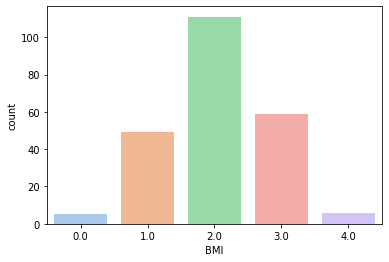

In [15]:
sns.countplot(x='BMI',data=df, palette="pastel")

# Models::

In [32]:
 #which similarity metrics to use /// jaccard, cosine, euclidean
similarity_selection = 'cosine'

#which clustering method to use /// kmeans, FCM, 
clustering_method = 'kmeans'

topN = 0.1

#number of clusters
k = 8

In [17]:
def DT(labeled_df):

    result = []

    ############################

    X= labeled_df.drop(['labels'],axis=1)
    y=labeled_df['labels']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=1)

    ############################

    DecisionTree = DecisionTreeClassifier(criterion='entropy', random_state =1)

    params = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': list(range(2,10)), 
              'min_samples_leaf':list(range(1,10))}

    tree_model = GridSearchCV(DecisionTree, param_grid=params,cv = 5, n_jobs = -1)
    tree_model.fit(X_train, y_train)
    tree_model.best_params_

    ############################

    DT_predicted_ytest = tree_model.predict(X_test)
#     print(classification_report(y_test,DT_predicted_ytest))

    precision = precision_score(y_test,DT_predicted_ytest, average='weighted',labels=np.unique(DT_predicted_ytest))
    recall = recall_score(y_test,DT_predicted_ytest, average='weighted')
    fScore = f1_score(y_test,DT_predicted_ytest, average='weighted')

#     if f1_Score_Array.mean() > 0.5:
#     result.append( f1_Score_Array.mean() )

    #     print(f1_Score_Array.mean())
    return {
        "precision":precision * 100, 
        "recall":recall * 100, 
        "fScore":fScore * 100, 
    }

In [39]:
def model(df_train, X_test) :
   
    if clustering_method =='kmeans':
        kmeans_model = KMeans(n_clusters = k, random_state=45)
        kmeans_model.fit(df_train)
        labelsList = kmeans_model.labels_
        metrics.silhouette_score(df_train, labelsList, metric='euclidean')
        y_kmeans = kmeans_model.predict(df_train)
        kmeans_predict = kmeans_model.fit_predict(df_train)

    elif clustering_method == 'FCM':
        fcm = FCM(n_clusters=k)
        fcm.fit(df_train)
        # outputs
        fcm_centers = fcm.centers
        labelsList = fcm.predict(df_train)





    labels = pd.DataFrame(labelsList)
    # labeledforplots = pd.concat((df,labels),axis=1)
    labels.index = df_train.index
    labeled_df = df_train.join(labels)
    labeled_df = labeled_df.rename({0:'labels'},axis=1)
    # sns.pairplot(labeled_df,hue='labels')
    dt_result = DT(labeled_df)






    #recoms list per cluster - method: top 5 


    recoms_list_per_cluster=[]
    for i in range(0,k):
        data_in_cluster = pd.DataFrame(labeled_df[labeled_df.labels == i])
    #     print('data_in_cluster',data_in_cluster)
        recoms = []
        listt =[]
        for row in data_in_cluster.index:
            recoms = links_data[links_data.patientID==row]['recomID'].values.tolist()
#             print("row:",row)
#             print("recoms:",recoms)

            for recoms in recoms:
                listt.append(recoms)
    #     list_df = pd.DataFrame(listt)
        c = Counter(listt)
        n =math.ceil(len(data_in_cluster) * topN)
        num_of_recoms =len(np.unique(np.array(listt)) ) 
#         print('num of data:',len(data_in_cluster))
#         print('threshold:',n)

        ##
            #model1
#         unique_list = c.most_common(10)       
            #model2
        unique_list = c.most_common(math.ceil(num_of_recoms * topN))        

        list_to_dict = {k:c for k, c in unique_list if c is not None}
        recoms_list_per_cluster.append(list_to_dict.keys())
        
        ##
        #model3
#         unique_list = Counter({k:c for k, c in c.items() if c >= n})
#         recoms_list_per_cluster.append(unique_list.keys())
    
        
#         print('clusterID:', i)
#         print('related recoms:', unique_list)
#         print()

    # recoms_list_per_cluster = pd.DataFrame(recoms_list_per_cluster)
    # recoms_list_per_cluster



    


    #cosine_similarity 
    cosineSim = cosine_similarity(X_test, df_train)
    cosine_similarity_df = pd.DataFrame(cosineSim)
    # print(cosine_similarity_df.shape)








    #Jaccard Similarity  
    # df
    Jaccard_Similarity = []

    for i in X_test.index:
    #     print(i)
        test_item = df.loc[i]
        similarity_list = []
    #     print(df.iloc[100])

        for j in df_train.index:
    #         print(j)
            train_item = df_train.loc[j]
            intersection = len(list(set(test_item).intersection(train_item)))
            union = (len(test_item) + len(train_item)) - intersection
            result = float(intersection) / union
            similarity_list.append(result)
        Jaccard_Similarity.append(similarity_list)
    Jaccard_Similarity_df = pd.DataFrame(Jaccard_Similarity)






    # euclidean distance
    euclidean_similarity = []

    for i in X_test.index:
        test_item = df.loc[i]
        similarity_list = []

        for j in df_train.index:
            train_item = df_train.loc[j]
            dst = distance.euclidean(test_item, train_item)
            similarity_list.append(1/dst)
        euclidean_similarity.append(similarity_list)

    euclidean_similarity_df = pd.DataFrame(euclidean_similarity)










    #set similarity_selection before model start
    if(similarity_selection == "cosine"):
        similarity_df = cosine_similarity_df
    elif(similarity_selection == "jaccard"):
        similarity_df = Jaccard_Similarity_df
    elif(similarity_selection == "euclidean"):
        similarity_df = euclidean_similarity_df
    # similarity_df









    # get top three sorted for all rows

    top_similar = []

    for row in similarity_df.index:
        newitem = similarity_df.iloc[row].sort_values(ascending=False).iloc[0]
        newitem_id = similarity_df.iloc[row].sort_values(ascending=False).index[0]
    #     print(row,";;", newitem,';;', newitem_id)
        top_similar.append(( newitem_id, newitem))
    top_similar_df =pd.DataFrame(top_similar, columns=['id','value'])

    # top_similar_df









    # get top similar data with cluster id and patient's id for all rows

    user_id = []
    similar_id_1 = []
    value_1 = []
    cluster_id1 = []

    top_similar = {}

    for row in top_similar_df.index:

        index1 =int(top_similar_df.iloc[row].id) 

        user_id.append(X_test.index[row])
        similar_id_1.append(df_train.index[index1])
        value_1.append(top_similar_df.iloc[row].value)
        cluster_id1.append(labeled_df.iloc[int(index1)].labels)


        top_similar = {
            'user_id': user_id,
            'similar_id_1': similar_id_1,
            'value_1': value_1,
            'cluster_id1':cluster_id1,
            }

    top_similar_df = pd.DataFrame(top_similar)















    #show recoms list for each test sample based on its cluster id

    cluster_recoms=[]
    precision_list = []
    recall_list = []
    fmeasure_list = [0]
    mae_list = []

    for i in top_similar_df.index:
        row = top_similar_df.iloc[int(i)]
#         print(row.cluster_id1)
#         print(recoms_list_per_cluster)
        cluster_new_recoms = recoms_list_per_cluster[int(row.cluster_id1)]
        real_recoms = links_data[links_data.patientID==row.user_id]['recomID'].values.tolist()

        recoms_intersection_set = set()
        recoms_intersection_set = set(cluster_new_recoms)
        recoms_intersection_set = recoms_intersection_set.intersection(real_recoms)
        if len(real_recoms) != 0:

            #compute precision:::
            precision = 0
            if len(cluster_new_recoms) != 0:
                precision = (len(recoms_intersection_set) / len(cluster_new_recoms))*100
            precision_list.append(precision)

            #compute recall:::
            recall = (len(recoms_intersection_set) / len(real_recoms))*100
            recall_list.append(recall)

            #compute fmeasure:::
            if recall+precision != 0 :
                del fmeasure_list[:]
                fmeasure = (2*(recall*precision) / (recall+precision))
                fmeasure_list.append(fmeasure)

            #compute MAE:::
            realArray = []
            predArray = []
            subtractArray = []
            for j in range(len(recoms_data)):
                ID = recoms_data.iloc[j].id

                if ID in real_recoms:
                    realArray.append(1)
                else:
                    realArray.append(0)

                if ID in cluster_new_recoms:
                    predArray.append(1)
                else:
                    predArray.append(0)

                subtractArray.append(abs(predArray[j] - realArray[j]))

            mae_list.append(sum(subtractArray)/len(recoms_data)*100)


            print(i)    
            print('userid:', row.user_id)
            print('cluster_new_recoms:', cluster_new_recoms)
            print('real_recoms', real_recoms)
            print(recoms_intersection_set)
            print("precision: ", precision)
            print("recall: ", recall)
            print("MAE: ", sum(subtractArray)/len(recoms_data)*100)
            print()










    #calculate accuracy
    # avrg_accuracy = mean(accuracy_list) 
    # print("accuracy mean: ", avrg_accuracy)

    #calculate precision
    avrg_precision = mean(precision_list) 
#     print("precision mean: ", avrg_precision)

    #calculate recall
    avrg_recall = mean(recall_list) 
#     print("recall mean: ", avrg_recall)

    #calculate fmeasure
    fmeasure = mean(fmeasure_list) 
#     print("fmeasure: ", fmeasure)

    #calculate MAE
    avrg_mae = mean(mae_list) 
#     print("MAE mean: ", avrg_mae)
    
    return {
        "avrg_precision":avrg_precision, 
        "avrg_recall":avrg_recall, 
        "fmeasure":fmeasure, 
        "avrg_mae":avrg_mae,
        "dt_result":dt_result
    }

In [19]:
shuffled_df = df.sample(frac=1)
# shuffled_df = df
shuffled_df 

,BMI,BPClass,age,sex,Family history of diabets,Family history of hypertension,chest pain,Shortness of breath,arm muscle pain,oily food,sodium,exercise,smoker,heart rate,heart rhythm,BP type,diabets
index,,,,,,,,,,,,,,,,,
198,2,0,1,0,0,1,0,0,0,1,1,0,0,2,0,0,0
84,1,0,2,1,1,0,0,0,1,1,1,4,4,2,0,1,0
3,3,0,2,0,0,1,1,1,1,0,2,0,0,3,0,0,1
192,2,0,2,0,0,1,0,0,0,1,1,0,0,4,0,0,1
164,2,0,1,1,1,0,0,0,0,1,0,4,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2,0,3,0,0,1,2,2,1,0,2,0,0,2,0,1,0
163,2,0,2,0,1,1,0,0,0,0,2,4,0,3,0,1,1
50,2,0,3,1,0,0,1,0,0,0,2,4,0,3,0,1,0


In [40]:
# k-fold cross validation

# print(df.shape)

c = len(shuffled_df)
fold = math.ceil(c/10)
# print(shuffled_df.iloc[0:15])
# maindf.reset_index()
# print(df)
fold_array=[]
results = []

for i in range(0,10):
    
    fold_array.append( shuffled_df.iloc[fold*i:fold*(i+1)] )
   
    test = shuffled_df.iloc[fold*i:fold*(i+1)]
    train = pd.concat([shuffled_df, test]).drop_duplicates(keep=False)
    print(i)
    print(train.shape)    
    print(test.shape)
    
    results.append( model( train , test ) )
    
    
# print(fold_array)
# del results[0:2]
newdf = pd.DataFrame(results)

print('############ final results : #############')
print('counter:: most common k:c for k, c in c.items() if c >= n')

# print(results)
print()
# print(newdf)

print("avrg_precision:::", newdf["avrg_precision"].mean())
print("avrg_recall:::", newdf["avrg_recall"].mean() )
print("fscore mean:::", newdf["fmeasure"].mean() )
print("fscore:::", 2*(newdf["avrg_recall"].mean()*newdf["avrg_precision"].mean()) / (newdf["avrg_recall"].mean()+newdf["avrg_precision"].mean()) )
print("avrg_mae:::", newdf["avrg_mae"].mean() )

print()

dt_data = []
for k in range(len(np.array(newdf["dt_result"]))):
    dt_data.append(newdf["dt_result"][k])
dt_df = pd.DataFrame(dt_data)
print("avrg_DT_precision:::", dt_df['precision'].mean() )
print("avrg_DT_recall:::", dt_df['recall'].mean() )
print("avrg_DT_fscore:::", dt_df['fScore'].mean() )

0
(202, 17)
(23, 17)


C:\Users\arefe\anaconda3\envs\RecSys\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0
userid: 198.0
cluster_new_recoms: dict_keys([57, 55])
real_recoms [35]
set()
precision:  0.0
recall:  0.0
MAE:  5.172413793103448

1
userid: 84.0
cluster_new_recoms: dict_keys([67, 55])
real_recoms [67]
{67}
precision:  50.0
recall:  100.0
MAE:  1.7241379310344827

2
userid: 3.0
cluster_new_recoms: dict_keys([57, 55, 67])
real_recoms [0]
set()
precision:  0.0
recall:  0.0
MAE:  5.172413793103448

3
userid: 192.0
cluster_new_recoms: dict_keys([57, 55])
real_recoms [35]
set()
precision:  0.0
recall:  0.0
MAE:  5.172413793103448

4
userid: 164.0
cluster_new_recoms: dict_keys([57, 55, 67])
real_recoms [57, 67]
{57, 67}
precision:  66.66666666666666
recall:  100.0
MAE:  1.7241379310344827

5
userid: 196.0
cluster_new_recoms: dict_keys([55, 35])
real_recoms [67]
set()
precision:  0.0
recall:  0.0
MAE:  5.172413793103448

6
userid: 48.0
cluster_new_recoms: dict_keys([55, 35])
real_recoms [51, 57, 68, 28]
set()
precision:  0.0
recall:  0.0
MAE:  10.344827586206897

7
userid: 160.0
cluster_ne

C:\Users\arefe\anaconda3\envs\RecSys\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0
userid: 183.0
cluster_new_recoms: dict_keys([57, 67])
real_recoms [55, 57, 61, 68, 40, 18]
{57}
precision:  50.0
recall:  16.666666666666664
MAE:  10.344827586206897

1
userid: 105.0
cluster_new_recoms: dict_keys([57, 35])
real_recoms [67, 46, 21]
set()
precision:  0.0
recall:  0.0
MAE:  8.620689655172415

2
userid: 229.0
cluster_new_recoms: dict_keys([55, 67])
real_recoms [51, 67]
{67}
precision:  50.0
recall:  50.0
MAE:  3.4482758620689653

3
userid: 155.0
cluster_new_recoms: dict_keys([57, 55])
real_recoms [55, 39]
{55}
precision:  50.0
recall:  50.0
MAE:  3.4482758620689653

4
userid: 176.0
cluster_new_recoms: dict_keys([67, 61])
real_recoms [55, 57]
set()
precision:  0.0
recall:  0.0
MAE:  6.896551724137931

5
userid: 195.0
cluster_new_recoms: dict_keys([67, 61])
real_recoms [35]
set()
precision:  0.0
recall:  0.0
MAE:  5.172413793103448

6
userid: 124.0
cluster_new_recoms: dict_keys([57, 55])
real_recoms [57, 67]
{57}
precision:  50.0
recall:  50.0
MAE:  3.4482758620689653

7
u

C:\Users\arefe\anaconda3\envs\RecSys\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0
userid: 180.0
cluster_new_recoms: dict_keys([57, 67])
real_recoms [57, 67, 38]
{57, 67}
precision:  100.0
recall:  66.66666666666666
MAE:  1.7241379310344827

1
userid: 178.0
cluster_new_recoms: dict_keys([67])
real_recoms [57, 67, 8, 9, 7, 40, 46]
{67}
precision:  100.0
recall:  14.285714285714285
MAE:  10.344827586206897

2
userid: 187.0
cluster_new_recoms: dict_keys([57, 61])
real_recoms [57, 61, 63, 67]
{57, 61}
precision:  100.0
recall:  50.0
MAE:  3.4482758620689653

3
userid: 91.0
cluster_new_recoms: dict_keys([57, 67])
real_recoms [55, 57, 59, 35]
{57}
precision:  50.0
recall:  25.0
MAE:  6.896551724137931

5
userid: 38.0
cluster_new_recoms: dict_keys([57, 55])
real_recoms [55, 57, 67]
{57, 55}
precision:  100.0
recall:  66.66666666666666
MAE:  1.7241379310344827

6
userid: 209.0
cluster_new_recoms: dict_keys([57, 55, 22])
real_recoms [59, 67, 38]
set()
precision:  0.0
recall:  0.0
MAE:  10.344827586206897

7
userid: 41.0
cluster_new_recoms: dict_keys([57, 67, 55])
real_recom